# Drift and Diffusion Coefficients

Figure 10.5 from Chapter 10 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Plot of the drift coefficient $-A(\Delta v_\parallel)$, in arbitrary units, for a Maxwellian velocity distribution,
and the diffusion coefficient $D\left(|\Delta \vec{v}_\perp|^2 \right)$ and $D(\delta v_\parallel^2)$,
shown as the solid line. Diffusion coefficients are in units of the constant $C_0$.


In [5]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

# scipy for erf()

from scipy import special

# suppress nuisance warnings

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [6]:
plotFile = 'Fig10_5.png' 

# graphic aspect ratio = width/height

aspect = 2.5

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Drift and Diffusion Coefficients

### Drift Coefficient

From Eqn 10.53

\begin{equation}
   A ( \Delta v_\parallel ) = - C_0 \frac{1+m/m_\star}{\sqrt{2} \sigma} G_\mathrm{df} (X)
\end{equation}
with normalization constant
\begin{equation}
   C_0 = 4\sqrt{2}\pi \frac{G^2 \rho_\star m_\star \ln\Lambda}{\sigma} ,
\end{equation}
where $X = v/(\sqrt{2}\sigma)$ is the dimensionless speed of the test star and
$G_\mathrm{df} (X)$ is the dynamical friction function:
\begin{equation}
   G_\mathrm{df} (X) = \frac{1}{2 X^2} \left[\mathrm{erf} (X) - \frac{2}{\sqrt\pi} X e^{-X^2} \right] 
\end{equation}
To calculate $A(\Delta v_\parallel)$ in "arbitrary units" we really just plot $G_{\rm df}(X)$

### Diffusion Coefficients
 
The perpendicular and parallel diffusion coefficients are:
\begin{equation}
  D(\Delta |\vec{v}_\perp|^2) = C_0\left(\frac{\mathrm{erf}(X) - G_\mathrm{df}(X)}{X}\right) 
\end{equation}
and
\begin{equation}
  D(\Delta v_\parallel^2) = C_0\left(\frac{G_\mathrm{df}(X)}{X}\right)
\end{equation}

In [7]:
def Gdf(X):
    return (special.erf(X) - (2.0/np.sqrt(np.pi))*X*np.exp(-X*X))/(2*X*X)

def Dperp(X):
    return ((special.erf(X)-Gdf(X))/X)

def Dpara(X):
    return (Gdf(X)/X)
    

## Calculate the drift and diffusion coefficients

Calculate the drift and diffusion coefficients in arbitrary units of the constant $C_0$ for logarithmi
intervals in X from 0.01 to 100.

In [8]:
minX = 0.01
maxX = 100.

X = 10.0**np.linspace(np.log10(minX),np.log10(maxX),301)

# plotting limits

xMin = minX
xMax = maxX

yMin = 2e-5
yMax = 2.0

## Figure 10.5: side by side format

Left panel: $-A$ vs $X$ as a log-log plot

Right panel: $D/C_0$ vs $X$ as a log-log plot, parallel as solid, perpendicular as dashed


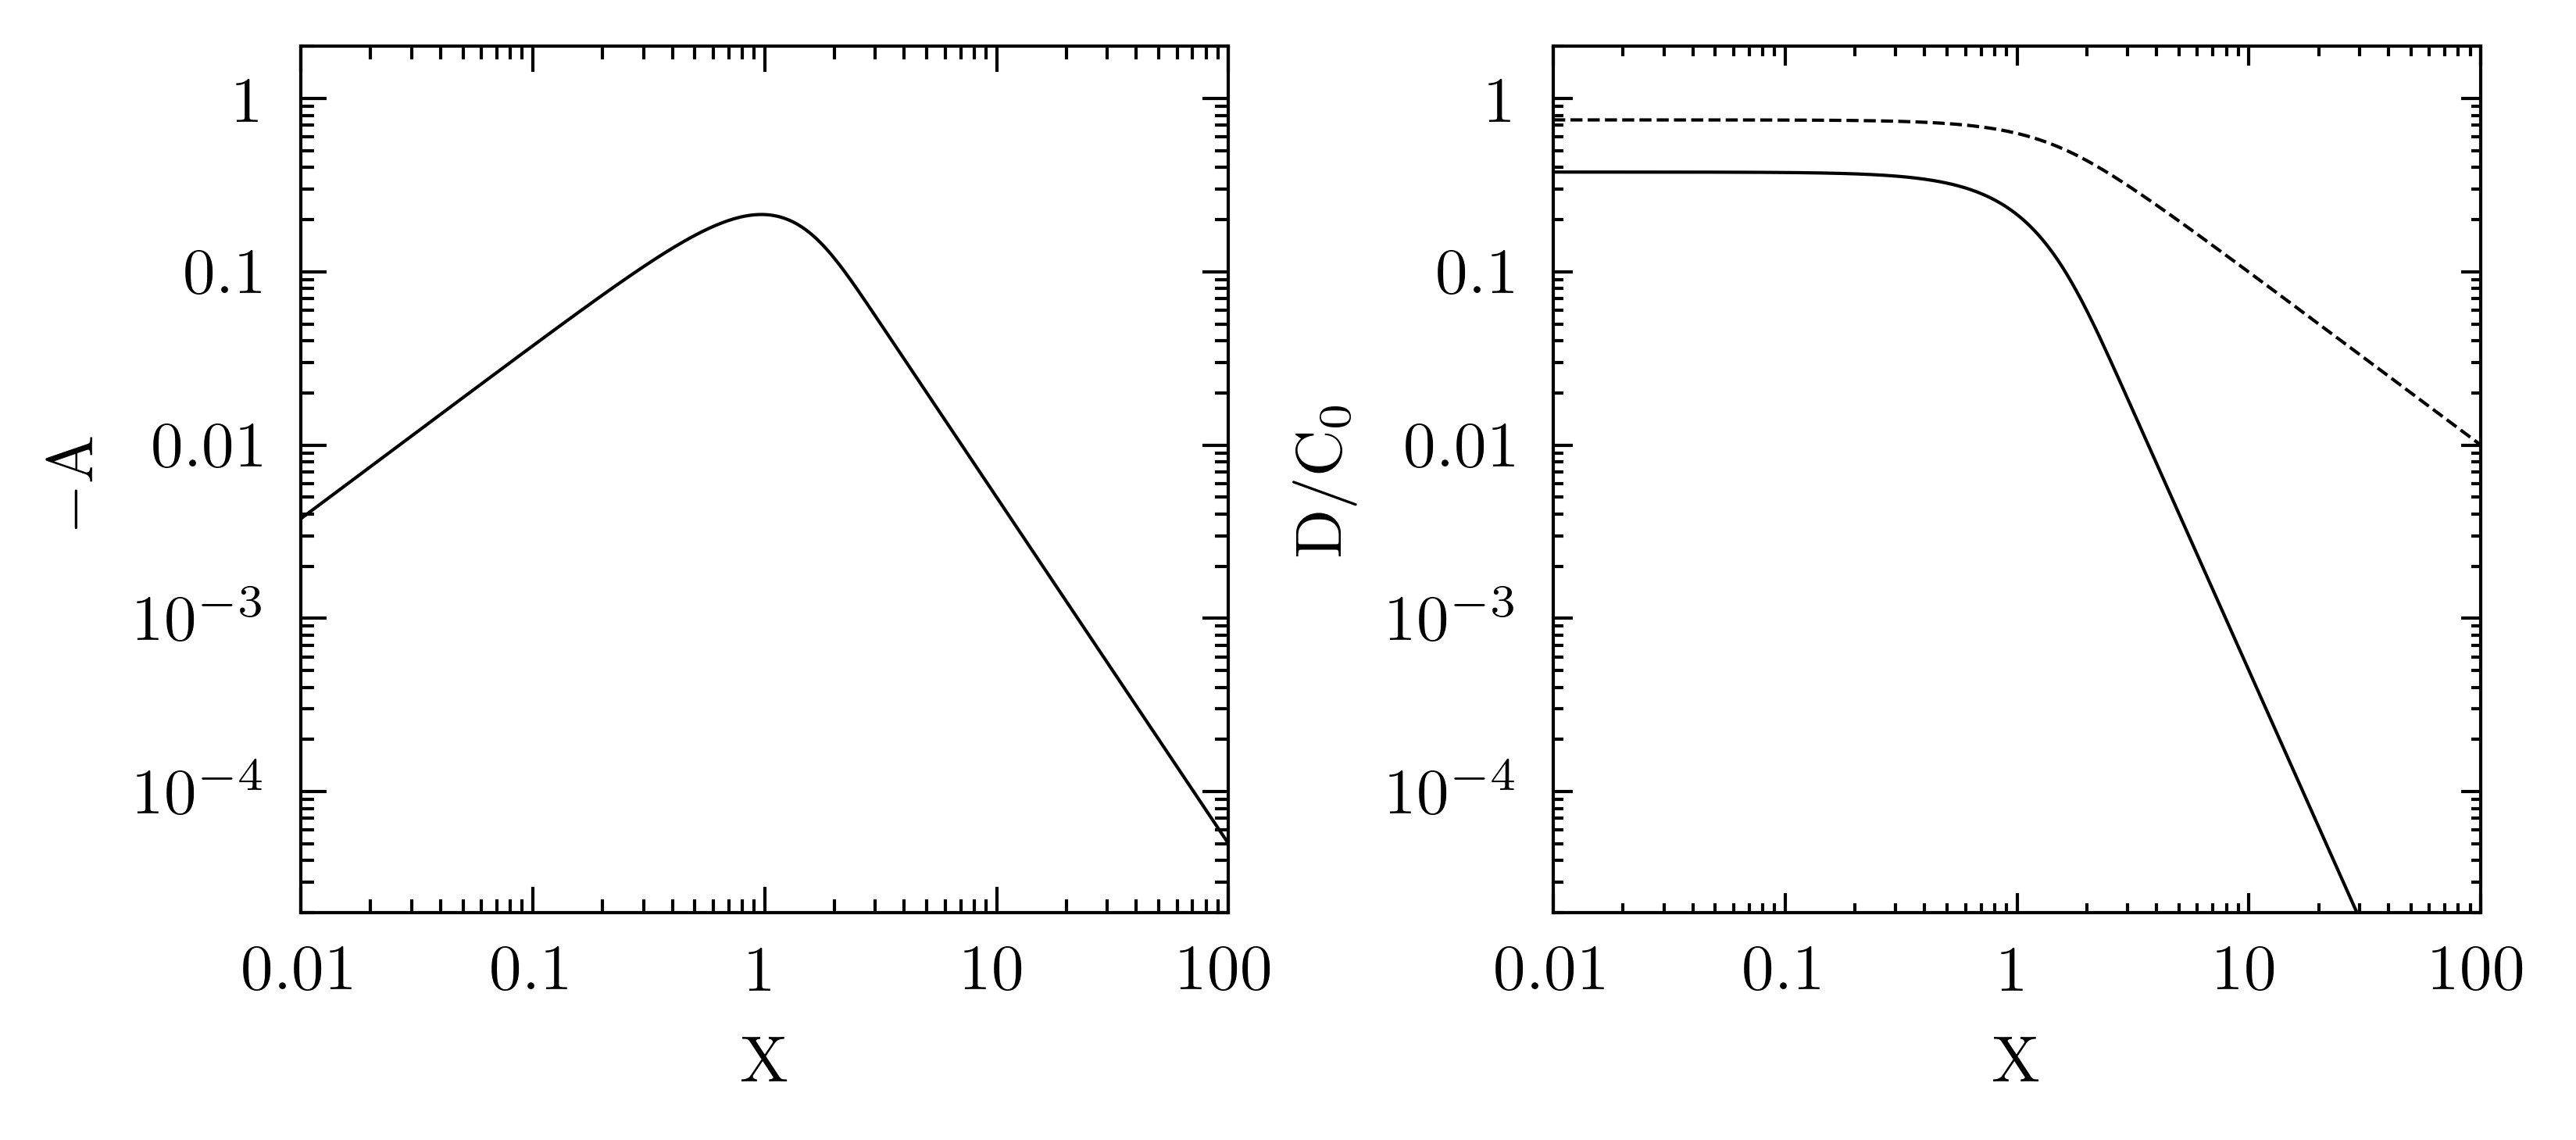

In [9]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
fig.subplots_adjust(wspace=0.35, hspace=0.0)

# left panel: drift coefficient

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax1.set_xlim(xMin,xMax)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax1.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax1.xaxis.set_minor_formatter(NullFormatter())
ax1.set_xticks([0.01,0.1,1,10,100])
ax1.set_xticklabels(['0.01','0.1','1','10','100'])
ax1.set_xlabel(r'X',fontsize=axisFontSize)

ax1.set_ylim(yMin,yMax)
ax1.set_yscale('log')
ax1.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax1.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax1.yaxis.set_minor_formatter(NullFormatter())
ax1.set_yticks([1e-4,1e-3,0.01,0.1,1])
ax1.set_yticklabels(['10$^{-4}$','10$^{-3}$','0.01','0.1','1'])
ax1.set_ylabel(r'$-$A',fontsize=axisFontSize)

ax1.plot(X,Gdf(X),'-',lw=0.5,color='black',zorder=9)

# right panel: diffusion coefficients

ax2.tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')

ax2.set_xlim(xMin,xMax)
ax2.set_xscale('log')
ax2.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax2.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax2.xaxis.set_minor_formatter(NullFormatter())
ax2.set_xticks([0.01,0.1,1,10,100])
ax2.set_xticklabels(['0.01','0.1','1','10','100'])
ax2.set_xlabel(r'X',fontsize=axisFontSize)

ax2.set_ylim(yMin,yMax)
ax2.set_yscale('log')
ax2.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax2.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax2.yaxis.set_minor_formatter(NullFormatter())
ax2.set_yticks([1e-4,1e-3,0.01,0.1,1])
ax2.set_yticklabels(['10$^{-4}$','10$^{-3}$','0.01','0.1','1'])
ax2.set_ylabel(r'D/C$_0$',fontsize=axisFontSize)

ax2.plot(X,Dpara(X),'-',lw=0.5,color='black',zorder=9)
ax2.plot(X,Dperp(X),'--',lw=0.5,color='black',zorder=9)
    
plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')